<a href="https://colab.research.google.com/github/fangyiyu/auto_mpg/blob/main/wine_classification_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Required Libraries  
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
# read data
column_names = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wine_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", names=column_names, sep =',') 
wine_data.tail()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [3]:
# split features from labels and encode label
X = wine_data.iloc[:, 1:] 
y = wine_data.iloc[:, 0] 
df_hotencoded = pd.get_dummies(y)

In [4]:
# scale features
sc = StandardScaler()
X = sc.fit_transform(X)

In [5]:
# Splitting the dataset for training and validating  
x_train, x_test, y_train, y_test = train_test_split( 
           X, df_hotencoded, test_size = 0.2, random_state = 45) 

In [6]:
(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

((142, 13), (36, 13), (142, 3), (36, 3))

In [17]:
# build model
regular = 0.00001
model = tf.keras.Sequential()
model.add(layers.Dense(12, input_shape = (13, ), activation='relu',
          kernel_regularizer = tf.keras.regularizers.l2(regular),
          activity_regularizer = tf.keras.regularizers.l2(regular)))
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(3, activation = 'softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs =50, validation_split=0.2) 

Epoch 1/50
4/4 [==============================] - 0s 42ms/step - loss: 1.0460 - accuracy: 0.3982 - val_loss: 1.0363 - val_accuracy: 0.3793
Epoch 2/50
4/4 [==============================] - 0s 6ms/step - loss: 1.0453 - accuracy: 0.4071 - val_loss: 1.0142 - val_accuracy: 0.3793
Epoch 3/50
4/4 [==============================] - 0s 6ms/step - loss: 1.0339 - accuracy: 0.4248 - val_loss: 0.9949 - val_accuracy: 0.3448
Epoch 4/50
4/4 [==============================] - 0s 6ms/step - loss: 1.0159 - accuracy: 0.4248 - val_loss: 0.9778 - val_accuracy: 0.3793
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 0.9848 - accuracy: 0.4602 - val_loss: 0.9619 - val_accuracy: 0.4138
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 0.9450 - accuracy: 0.4867 - val_loss: 0.9465 - val_accuracy: 0.4138
Epoch 7/50
4/4 [==============================] - 0s 6ms/step - loss: 0.9556 - accuracy: 0.4690 - val_loss: 0.9310 - val_accuracy: 0.4828
Epoch 8/50
4/4 [=================

In [18]:
model.evaluate(x_test, y_test)
y_pred = model.predict(x_test) 

2/2 [==============================] - 0s 2ms/step - loss: 0.0527 - accuracy: 1.0000


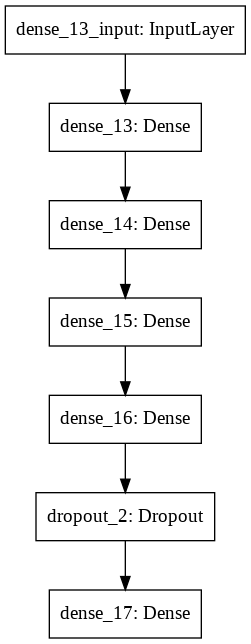

In [19]:
tf.keras.utils.plot_model(model, to_file='wine_model.png')

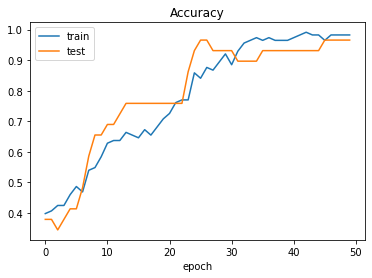

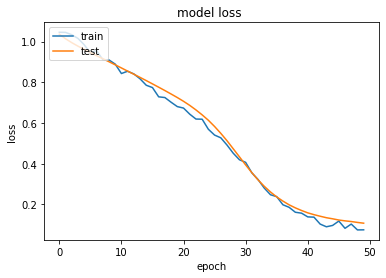

In [20]:
def plot_model(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss ')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

plot_model(hist)

In [21]:
# prepare for predicting labels
# read sample data
url = 'https://github.com/fangyiyu/auto_mpg/blob/main/wine_sample.xlsx?raw=true'
x_pred = pd.read_excel(url)

In [22]:
# scale features
x_pred = x_pred[:13].transpose()[1:]
x_pred = sc.fit_transform(x_pred)
x_pred = pd.DataFrame(x_pred)

In [23]:
# predict
y_pred = model.predict(x_pred) 
y_pred_class=np.argmax(y_pred,axis=1)
y_pred_class

array([2, 1, 1, 1, 0, 1, 1, 2, 0, 2])